# Unit 2 Lesson 4 Explanatory power: assumptions of linear regression

In [26]:
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import scipy.stats as stats

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


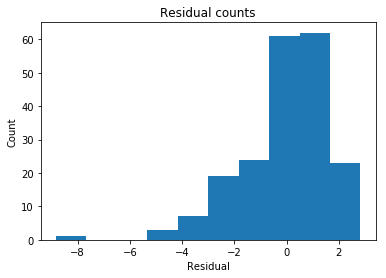

In [4]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

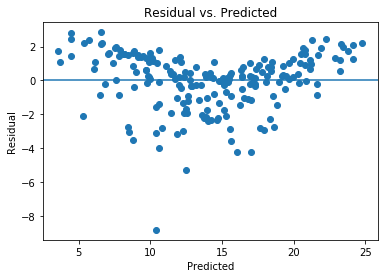

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [6]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [24]:
new_data = data.copy()

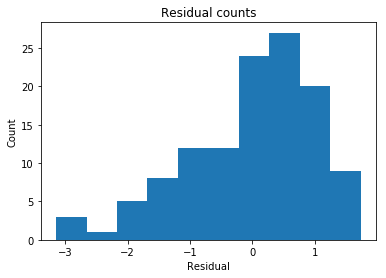

In [36]:
new_data = data[(np.abs(stats.zscore(data)) <= 1.5).all(axis=1)]
new_data.describe()

Y = new_data['Sales'].values.reshape(-1, 1)
X = new_data[['TV','Radio','Newspaper']]
regr.fit(X, Y)
# Extract predicted values.
new_predicted = regr.predict(X).ravel()
new_actual = new_data['Sales']

# Calculate the error, also called the residual.
new_residual = new_actual - new_predicted

# This looks a bit concerning.
plt.hist(new_residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

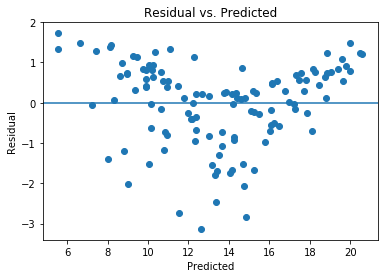

In [37]:
# fixed the multivariate normality issue lets see if the homoscedasticity issue changed
plt.scatter(new_predicted, new_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

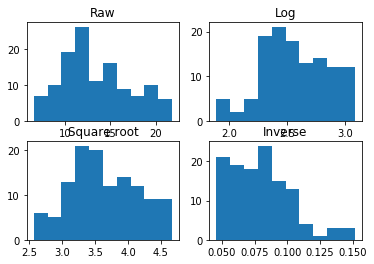

In [47]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(new_data['Sales'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(new_data['Sales']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(new_data['Sales']))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/new_data['Sales'])
plt.title('Inverse')
plt.show()

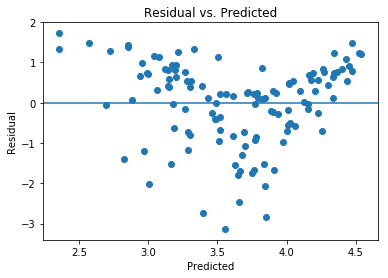

In [63]:
new_sales = np.sqrt(new_data['Sales'])

plt.scatter(new_new_pred, new_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

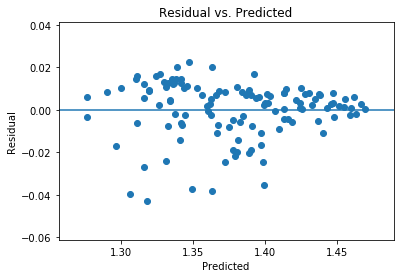

In [68]:
# Transforming sales with square root to hopefully take take of the homoscedasticity problem.
new_sales = np.sqrt(new_data['Sales'])
Y = new_sales.values.reshape(-1, 1)
X = new_data[['TV','Radio','Newspaper']]
regr.fit(X, Y)
new_new_pred = regr.predict(X).ravel()
plt.scatter(new_new_pred, new_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#### Our distribution of error is much more consistent than before